# Brain tumor Detection

### Project Flow 
1. Data preparation/collection
2. Exploratorary data analysis
3. Data Augmentation
4. Data preprocessing 
5. Data spliting  
6. Model Building 
7. Unfreezing and fine-tuning 
8. flask web app

##### 1. Data collection

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2 # using the open cv library for image processing
import os , shutil # using os to get the dataset and shutil for performing high-level operations on a file, such as copy, create, and remote operations. 
import matplotlib.image as mpimg
plt.style.use('ggplot')

In [2]:
# Getting the shape of the yes tumor dataset 
list_yes = os.listdir("brain_tumor_dataset/yes/")
number_files_yes = len(list_yes)
print(number_files_yes)

# Getting the shape of the no tumor dataset 
list_no = os.listdir("brain_tumor_dataset/no/")
number_files_no = len(list_no)
print(number_files_no)

155
98


##### 2. EDA : Exploratory Data Analysis

c:\Users\radhe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


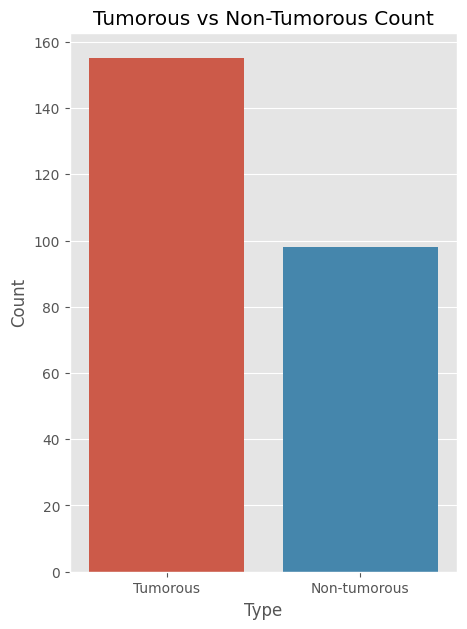

In [3]:
# Trying to figure out if the dataset is balanced or not
import matplotlib.pyplot as plt
import seaborn as sns

# Data: Tumorous and Non-tumorous counts
data = {'Tumorous': number_files_yes, 'Non-tumorous': number_files_no}

# Taking the keys for X-axis and values for Y-axis as lists
x_type = list(data.keys())  # Tumorous and Non-tumorous
y_type = list(data.values())  # Counts for each i.e number_files_yes and number_files_no

# Creating the bar plot
plt.figure(figsize=(5, 7))
sns.barplot(x=x_type, y=y_type)

# Adding title and labels
plt.title('Tumorous vs Non-Tumorous Count')
plt.xlabel('Type')
plt.ylabel('Count')

# Displaying the plot
plt.show()


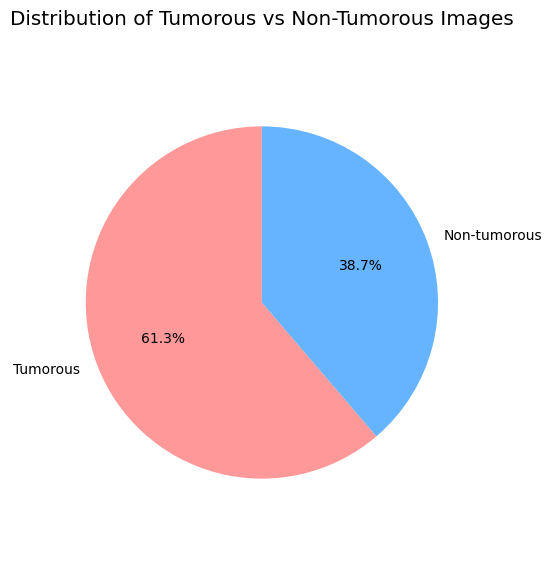

In [4]:
# Creating a BAR CHART for the yes & no and again Checking if the dataset is balanced or not 
import matplotlib.pyplot as plt
import seaborn as sns

# Data: Tumorous and Non-tumorous counts
data = {'Tumorous': number_files_yes, 'Non-tumorous': number_files_no}

# Taking the keys for X-axis and values for Y-axis as lists
x_type = list(data.keys())  # Tumorous and Non-tumorous
y_type = list(data.values())  # Counts for each

# Creating the bar plot
plt.figure(figsize=(5, 7))
plt.pie(y_type , labels= x_type, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Adding title
plt.title('Distribution of Tumorous vs Non-Tumorous Images')

# Display the pie chart
plt.show()

So, this is an Imbalanced Dataset 
61% of the data are YES and 39% are NO

##### 3. Data Augmentation

Here the amount of data we have for the model training and testing is very less, we need more data and due to this we are using data augmentation

Data augmentation is a technique used to artificially increase the size of a dataset by applying transformations (like rotations, flips, or color changes) to the existing data, often used in image processing to improve model performance.

In [5]:
# importing all the deep learning libraries requires
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense , Dropout , Flatten
from tensorflow.keras.applications.vgg19 import VGG19
# **VGG19** is a deep convolutional neural network with 19 layers, designed for image classification. It uses small filters (3x3) and focuses on simplicity and depth to achieve high accuracy in tasks like object recognition.
# Transfer learning** is a technique where a pre-trained model (like VGG19) is reused on a new, related task. Instead of training a model from scratch, the pre-trained model's knowledge is applied, speeding up training and improving performance, especially when the new dataset is small.
from tensorflow.keras.optimizers import SGD , Adam
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint , ReduceLROnPlateau

In [6]:
# This would print out how long the image augmentation process took, using the timing function to format it.
def timing(sec_elapsed):
    h = int(sec_elapsed / (60*60)) # for the hour
    m = int(sec_elapsed % (60*60) / 60) # for the minutes
    s = sec_elapsed % 60 # for the second 
    return f"{h}:{m}:{s}" # returning the hour , minutes and the seconds format 

In [7]:
# Parameters:
# file_dir: This would be the directory path containing the images that you want to augment.
# n_generated_samples: The number of augmented images to generate for each original image.
# save_to_dir: The directory where the augmented images will be saved.

def augmented_data(file_dir , n_generated_samples , save_to_dir):
    # The ImageDataGenerator class is used to apply transformations to images, such as rotations, shifts, flips, and brightness adjustments. These transformations help expand the dataset by generating new images, which is useful for improving the generalization of models, especially for deep learning.
    # Augmentation Techniques:
    # rotation_range=10: The images will be randomly rotated by up to 10 degrees.
    
    # width_shift_range=0.1: The images will be randomly shifted horizontally by up to 10% of the total width

    # height_shift_range=0.1: The images will be randomly shifted vertically by up to 10% of the total height.
    
    # shear_range=0.1: Shear transformations will be applied with a shear intensity of 0.1. used to slant or skew images
    
    # brightness_range=(0.3, 1.0): The brightness of the images will be adjusted randomly between 30% (darker) and 100% (original brightness).
    
    # horizontal_flip=True: Random horizontal flipping of the images will occur.
    
    # vertical_flip=True: Random vertical flipping of the images will occur.
    
    # fill_mode='nearest': When pixels are created as a result of shifts, rotations, or flips, they are filled in using the nearest pixel values.
    
    data_gen = ImageDataGenerator(rotation_range=10,width_shift_range=0.1 , height_shift_range=0.1 , shear_range=0.1 , brightness_range=(0.3 , 1.0) , horizontal_flip=True , vertical_flip=True , fill_mode= 'nearest')
    
    for filename in os.listdir(file_dir): # os.listdir(file_dir): This lists all the files (such as images) in the directory specified by file_dir. The loop iterates over each file (image) one by one.
        image = cv2.imread(file_dir + '/' + filename) # brain_tumor/yes/y_1.jpg
        image = image.reshape((1,) + image.shape) #  This reshapes the image to add an extra dimension. In machine learning, the model often expects batches of images, so this extra dimension indicates a batch size of 1. It transforms the image shape from (height, width, channels) to (1, height, width, channels).
        save_prefix = 'aug_' + filename[:-4] # filename[-4]: This part takes the 4th last character from the filename (often this would be the file extension, such as ".jpg").so it will be aug_.jpg , this is done so that we can distingusih between the augmented and the original image
        i = 0
        # data_gen.flow(...): This is where the ImageDataGenerator starts creating augmented versions of the image. The flow method generates augmented images based on the settings from the previous snippet:
        # x=image: The original image data to augment.
        # batch_size=1: Each batch will contain 1 augmented image (we process one image at a time).
        # save_to_dir=save_to_dir: The directory where the augmented images will be saved.
        # save_prefix=save_prefix: The prefix for the filename of each augmented image (e.g., aug_).
        # save_format="jpg": The format in which the augmented image will be saved (in this case, JPEG).
        for batch in data_gen.flow(x = image , batch_size = 1 , save_to_dir = save_to_dir , save_prefix = save_prefix , save_format = "jpg"):
            i += 1 # increment i by 1 everytime
            # when i exceeds the no of sample then we simply break
            if i > n_generated_samples:
                break

In [8]:
# Creating the yes path 
yes_path = r'D:\CODING\MACHINE LEARNING\MACHINE LEARNING PROJECTS\BrainTumor Detection\brain_tumor_dataset\yes'
# Creating the no path 
no_path = r'D:\CODING\MACHINE LEARNING\MACHINE LEARNING PROJECTS\BrainTumor Detection\brain_tumor_dataset\no'
# Creating the augmented data path 
augmented_data_path_yes = r'D:\CODING\MACHINE LEARNING\MACHINE LEARNING PROJECTS\BrainTumor Detection\augmented_data\yes'
augmented_data_path_no= r'D:\CODING\MACHINE LEARNING\MACHINE LEARNING PROJECTS\BrainTumor Detection\augmented_data\no'


In [9]:
# We are calculating the time required for ther data augmentation 
import time
start_time = time.time()
# let's start the Data Augmentation for the yes
augmented_data(file_dir = yes_path , n_generated_samples= 6 , save_to_dir= augmented_data_path_yes)
# Data Augmentation for the no
augmented_data(file_dir= no_path , n_generated_samples= 9 , save_to_dir= augmented_data_path_no)
end_time = time.time()

execution_time = end_time - start_time
print(timing(execution_time))

0:1:9.650341272354126


In [10]:

# The data_summary function provides a summary of the dataset after augmentation. It calculates and displays the total number of images (samples) and the percentage distribution of positive (tumor) and negative (non-tumor) samples

def data_summary():
    yes_path = augmented_data_path_yes
    no_path = augmented_data_path_no
    
    # getting the values of the augmented yes
    positive = len(os.listdir(augmented_data_path_yes)) 
    negative = len(os.listdir(augmented_data_path_no))
    total_data = positive + negative
    positive_percentage = (positive*100)/total_data
    negative_percentage = (negative*100)/total_data
    
    print("Total Number of augmented data is" , total_data)
    print("Number of tumor augmented data is" , positive)
    print("Number of non-tumor augmented data is" , negative)
    print("Percentage of tumor augmented data is" ,positive_percentage)
    print("Percentage of non-tumor augmented data is", negative_percentage)

In [11]:
# calling the data_summary function
data_summary()

Total Number of augmented data is 2063
Number of tumor augmented data is 1084
Number of non-tumor augmented data is 979
Percentage of tumor augmented data is 52.544837615123605
Percentage of non-tumor augmented data is 47.455162384876395


c:\Users\radhe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


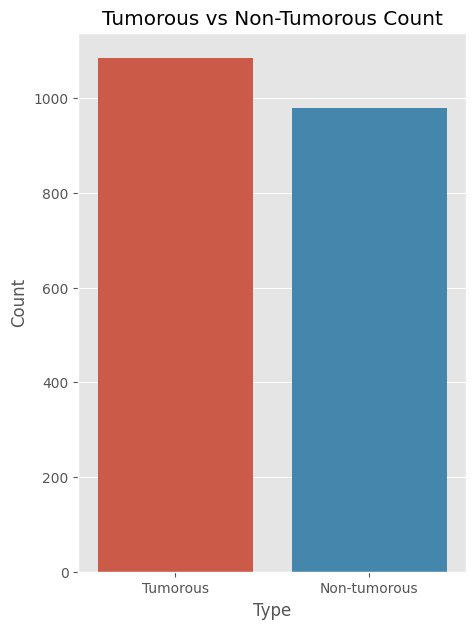

In [12]:
# Again Checking if the dataset is balanced or not 
import matplotlib.pyplot as plt
import seaborn as sns

# Data: Tumorous and Non-tumorous counts
data = {'Tumorous': len(os.listdir(augmented_data_path_yes)), 'Non-tumorous': len(os.listdir(augmented_data_path_no))}

# Taking the keys for X-axis and values for Y-axis as lists
x_type = list(data.keys())  # Tumorous and Non-tumorous
y_type = list(data.values())  # Counts for each

# Creating the bar plot
plt.figure(figsize=(5, 7))
sns.barplot(x=x_type, y=y_type)

# Adding title and labels
plt.title('Tumorous vs Non-Tumorous Count')
plt.xlabel('Type')
plt.ylabel('Count')

# Displaying the plot
plt.show()

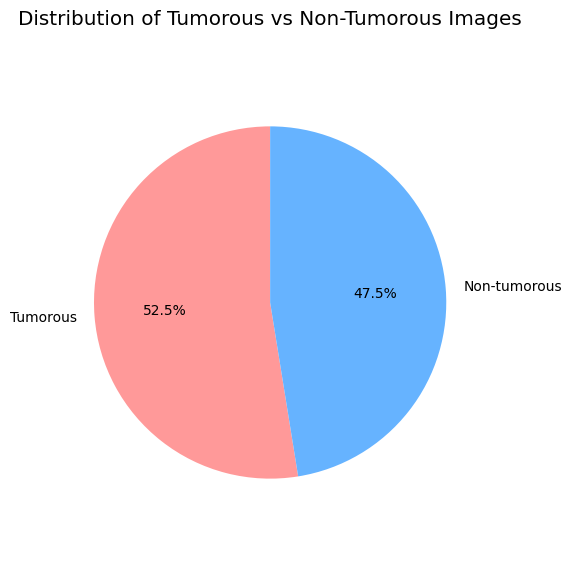

In [13]:
# Creating a BAR CHART for the Augmented yes & no
# Again Checking if the dataset is balanced or not 
import matplotlib.pyplot as plt
import seaborn as sns

# Data: Tumorous and Non-tumorous counts
data = {'Tumorous': len(os.listdir(augmented_data_path_yes)), 'Non-tumorous': len(os.listdir(augmented_data_path_no))}

# Taking the keys for X-axis and values for Y-axis as lists
x_type = list(data.keys())  # Tumorous and Non-tumorous
y_type = list(data.values())  # Counts for each

# Creating the bar plot
plt.figure(figsize=(5, 7))
plt.pie(y_type , labels= x_type, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Adding title
plt.title('Distribution of Tumorous vs Non-Tumorous Images')

# Display the pie chart
plt.show()

So from the above PIE CHART it is clear that the dataset is now balaneced 

### Data Preprocessing

These image processing techniques — **BGR to Grayscale conversion**, **Gaussian blur**, **thresholding**, **erosion**, **dilation**, and **finding contours** — are commonly used in brain tumor detection (and other medical image analysis) as part of the **preprocessing** pipeline. Let's break down how each is relevant to the process of brain tumor detection:

### 1. **Convert BGR to Grayscale**
   - **Purpose**: Medical images, such as MRI scans, often contain irrelevant color information. For brain tumor detection, we only care about intensity patterns and textures, not color.
   - **How it helps**: Converting a BGR image (which contains Blue, Green, and Red color channels) to **grayscale** (single intensity channel) simplifies the image, reducing the computational complexity and focusing on the essential structural features of the tumor.
   - **Usage**: `cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)`

### 2. **Gaussian Blur**
   - **Purpose**: Smooths the image to reduce noise and small irrelevant details. This helps in making tumor boundaries clearer.
   - **How it helps**: Blurring reduces high-frequency noise, making it easier for edge-detection algorithms and contour-finding algorithms to identify regions of interest such as tumor boundaries.
   - **Usage**: `cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)`

### 3. **Thresholding**
   - **Purpose**: Segments the image into binary regions (tumor vs. non-tumor) by converting the grayscale image into black and white based on a threshold value.
   - **How it helps**: Thresholding isolates potential tumor regions, creating a clear boundary between the background (normal brain tissue) and the abnormal region (tumor). This is especially useful for finding contours.
   - **Usage**: `_, threshold_image = cv2.threshold(gray_image, threshold_value, max_value, cv2.THRESH_BINARY)`

### 4. **Erosion**
   - **Purpose**: Shrinks the white regions (foreground) in a binary image, removing small noise or irrelevant details.
   - **How it helps**: After thresholding, small unwanted artifacts may still be present in the binary image. **Erosion** reduces these artifacts and refines the tumor region by eroding away boundaries.
   - **Usage**: `eroded_image = cv2.erode(binary_image, kernel, iterations)`

### 5. **Dilation**
   - **Purpose**: Expands the white regions (foreground) in the binary image, which is often used after erosion to restore the size of the detected region and fill in small gaps.
   - **How it helps**: After erosion, the actual tumor area might be slightly reduced. **Dilation** helps in restoring the shape of the tumor and fills any small gaps that might have been created during erosion.
   - **Usage**: `dilated_image = cv2.dilate(eroded_image, kernel, iterations)`

### 6. **Find Contours**
   - **Purpose**: Detects the boundaries of shapes (regions) in a binary image, such as the tumor boundary.
   - **How it helps**: Contour detection is used to find and highlight the exact shape of the tumor in the preprocessed MRI images. This is essential for accurately locating and segmenting the tumor.
   - **Usage**: `contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)`

---

### How These Are Used in Brain Tumor Detection:
These image processing techniques are often combined in a sequence to detect and highlight the tumor region in brain scans. Here's a typical flow:

1. **Convert BGR to Grayscale**: To simplify the image.
2. **Apply Gaussian Blur**: To remove noise that could interfere with tumor detection.
3. **Threshold the image**: To segment the tumor from the brain tissue.
4. **Erode and Dilate**: To refine the tumor region and remove noise.
5. **Find Contours**: To detect and outline the tumor, which is the region of interest.

This preprocessing step is essential for feature extraction, segmentation, and classification tasks in a brain tumor detection pipeline, improving the performance of machine learning or deep learning models by providing clean and structured data.

In [14]:
# 1. Convert BGR to Grayscale: To simplify the image.
# 2. Apply Gaussian Blur: To remove noise that could interfere with tumor detection.
# 3. Threshold the image: To segment the tumor from the brain tissue.
# 4. Erode and Dilate: To refine the tumor region and remove noise.
# 5. Find Contours: To detect and outline the tumor, which is the region of interest.
import imutils
def crop_brain_tumor(image , plot = False):
    # 1.Convert to Grayscale
    gray = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY) # Converts the input image (which is in color) to a grayscale image, reducing complexity since we only care about intensity values, not colors.
    # 2.Apply Gaussian Blur
    gray = cv2.GaussianBlur(gray , (5,5) , 0) # Blurs the grayscale image slightly using a Gaussian filter. This helps in reducing noise and small irrelevant details, making it easier to focus on larger features (like the tumor).
    # kernel (5,5) : This means a 5x5 pixel area of the image will be considered when applying the blur to each pixel.
    # A value of 0 means that the standard deviation will be calculated based on the kernel size. This affects how much the pixel values are averaged during the blurring process.
    # 3.Thresholding
    thres = cv2.threshold(gray , 45 , 255 , cv2.THRESH_BINARY)[1] # Thresholding is used to convert the blurred grayscale image into a binary image (black-and-white). Any pixel intensity above 45 is turned white (255), and anything below is turned black (0). This helps isolate the tumor region.
    # 4.Erosion and Dilation
    thes = cv2.erode(thres , None , iterations=2) # Erosion: Removes small white noise from the thresholded image.
    thres = cv2.dilate(thres, None, iterations=2) # Dilation: Expands the remaining white areas to restore the tumor region after erosion. These steps help in refining the boundaries of the tumor.
    # 5. Find Contours
    ## Contours are boundaries around the white regions (tumor). This part of the code detects the contours and then selects the largest contour, which is assumed to be the tumor
    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    
    # 6. Finding the extreme points of the tumor in the left , right , top and bottom direction 
    extLeft = tuple(c[c[:,:,0].argmin()][0]) # getting the leftmost part so we use the min ... c[c[:,:,0] --> to access the x-coordinate
    extRight = tuple(c[c[:,:,0].argmax()][0]) # getting the rightmost part so we use the max ... c[c[:,:,0] --> to access the x-coordinate
    extTop = tuple(c[c[:,:,1].argmin()][0]) # getting the topmost part so we use the min .... c[c[:,:,1] --> to access the y-coordinate
    extBottom = tuple(c[c[:,:,1].argmax()][0])# getting the bottom_most part so we use the maxm .... c[c[:,:,1] --> to access the y-coordinate
    
    # 7. Crop the original image to the new one    
    new_image = image[extTop[1]:extBottom[1], extLeft[0]:extRight[0]] # Crops the original image based on the extreme points found earlier, giving us a smaller image that focuses on the region containing the tumor.
    
    # 8. plotting the new and the old image 
    if plot:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title('Original Image')  
          
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.title('Cropped Image')
        plt.show()
        
    return new_image

In [15]:
# lets try now try the 'crop_brain_tumor' function and get the cropped image with the orignal one 
# img = cv2.imread(r"D:\CODING\MACHINE LEARNING\MACHINE LEARNING PROJECTS\BrainTumor Detection\augmented_data\no\aug_1 no._0_184.jpg")
# crop_brain_tumor(img , True)

In [16]:
# lets try now try the 'crop_brain_tumor' function and get the cropped image with the orignal one for the no brain tumor 
# img = cv2.imread(r"D:\CODING\MACHINE LEARNING\MACHINE LEARNING PROJECTS\BrainTumor Detection\augmented_data\no\aug_1 no._0_184.jpg")
# crop_brain_tumor(img , True)

In [17]:
# Applying the augmentation to the images and saving it to the yes and no folder
folder1 = r'D:\CODING\MACHINE LEARNING\MACHINE LEARNING PROJECTS\BrainTumor Detection\augmented_data\yes'
folder2 = r'D:\CODING\MACHINE LEARNING\MACHINE LEARNING PROJECTS\BrainTumor Detection\augmented_data\no'

for filename in os.listdir(folder1):
    img_path = os.path.join(folder1, filename)  # Use os.path.join for correct path formation
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load image: {img_path}")  # Print an error message if the image fails to load
        continue
    img = crop_brain_tumor(img, False)
    cv2.imwrite(img_path, img)

for filename in os.listdir(folder2):
    img_path = os.path.join(folder2, filename)
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load image: {img_path}")
        continue
    img = crop_brain_tumor(img, False)
    cv2.imwrite(img_path, img)


In [18]:
# this is for loading the data so that we can draw the features and o/p for the independent and dependent splitting 
from sklearn.utils import shuffle
def load_data(dir_list, image_size):
# dir_list: A list of directories, each containing images. Typically, you have directories like yes (images with brain tumors) and no (images without tumors).
# image_size: A tuple (image_width, image_height) that specifies the size to which each image will be resized.
    X = []
    y = []
    # X: Will store the processed image data (features).
    # y: Will store the corresponding labels (1 for images with tumors, 0 for images without tumors).
    
    image_width, image_height = image_size
    # Extracts the width and height values from image_size.
    
    for directory in dir_list:
        for filename in os.listdir(directory):
            image = cv2.imread(directory + '/' + filename) # Reading the image: The image is read using cv2.imread() from OpenCV.
            image = crop_brain_tumor(image, plot=False) # Cropping: The function crop_brain_tumor() is used to crop the brain tumor region (based on your earlier code).
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC) 
            # Resizing: The image is resized to the specified dimensions (image_width, image_height) using cubic interpolation (cv2.INTER_CUBIC), which smooths out the resized image.
            # cv2.INTER_CUBIC = Bicubic interpolation (slower but produces higher-quality results, especially when enlarging images).
            
            image = image / 255.00 # The pixel values of the image (which are in the range [0, 255]) are normalized to the range [0, 1] by dividing by 255. This helps the model converge faster during training by keeping values in a smaller range.
            X.append(image) # The processed image is appended to the X list.
            
            if directory[-3:] == "yes": # The label is determined by checking the last three characters of the directory name (i.e., "yes" for tumor, "no" for no tumor):
                y.append(1) # If the directory ends with "yes", it appends 1 to the y list (indicating the image contains a tumor).
            else:
                y.append(0) # Otherwise, it appends 0 to the y list (indicating no tumor).
                
    # The lists X and y are converted to NumPy arrays, which is a common format for machine learning tasks because NumPy arrays are efficient for numerical computations.
    X = np.array(X)
    y = np.array(y)
    
    X, y = shuffle(X, y)
    # Why shuffling: Imagine if all your tumor images (y = 1) came first in your dataset and all non-tumor images (y = 0) followed. If you split your dataset into training and testing sets in this order, your model could end up only seeing one class (tumor or non-tumor) in the training data, leading to poor performance on the test set.
    
    print(f"Number of examples is : {len(X)}")
    print(f"X SHAPE is : {X.shape}")
    print(f"y SHAPE is : {y.shape}")
    
    return X, y


In [19]:
# Generating the X and y i.e the features and the dataset using the load_data function 
augmented_data_path_yes = r'D:\CODING\MACHINE LEARNING\MACHINE LEARNING PROJECTS\BrainTumor Detection\augmented_data\yes'
augmented_data_path_no= r'D:\CODING\MACHINE LEARNING\MACHINE LEARNING PROJECTS\BrainTumor Detection\augmented_data\no'

IMAGE_WIDTH , IMAGE_HEIGHT = (240,240)
X , y = load_data([augmented_data_path_yes , augmented_data_path_no] , [IMAGE_HEIGHT , IMAGE_WIDTH])

Number of examples is : 2063
X SHAPE is : (2063, 240, 240, 3)
y SHAPE is : (2063,)


### Train test split

In [20]:
# base directory 
base_dir = 'tumorous_and_non-tumorous'
os.mkdir(base_dir)

In [21]:
# Now making the train directory , test directory and the validation directory

# train directory
train_dir = os.path.join(base_dir , 'train')
os.mkdir(train_dir)
# test directory
test_dir = os.path.join(base_dir , 'test')
os.mkdir(test_dir)
# validation directory
validation_dir = os.path.join(base_dir , 'validation')
os.mkdir(validation_dir)

In [22]:
# making the tumorous and the non-tumorous dir in the train, test and the validation 

# for the traning
infected_dir_train = os.path.join(train_dir , 'tumorous')
os.mkdir(infected_dir_train)
non_infected_dir_train = os.path.join(train_dir , 'non-tumorous')
os.mkdir(non_infected_dir_train)

# for the testing 
infected_dir_test = os.path.join(test_dir , 'tumorous')
os.mkdir(infected_dir_test)
non_infected_dir_test = os.path.join(test_dir , 'non-tumorous')
os.mkdir(non_infected_dir_test)

# for the validation 
infected_dir_valid = os.path.join(validation_dir , 'tumorous')
os.mkdir(infected_dir_valid)
non_infected_dir_valid = os.path.join(validation_dir , 'non-tumorous')
os.mkdir(non_infected_dir_valid)

Copying the files from the augmented/yes to the training , testing and the validation

In [23]:
# TRAINING 

# Define directories for tumor and non-tumor images
tumor_dir = 'augmented_data/yes/'

# Get the list of all files in the tumor directory
tumor_files = os.listdir(tumor_dir)

# Select the first 759 files i.e 80% of the data for training from the tumor directory
selected_files = tumor_files[:759]

# Copy selected tumor files to the target directory
for file_name in selected_files:
    src_path = os.path.join(tumor_dir, file_name)  # Source file path
    dst_path = os.path.join(infected_dir_train, file_name)  # Destination file path
    shutil.copyfile(src_path, dst_path)  # Copy the file

In [24]:
# TESTING

# Define directories for tumor and non-tumor images
tumor_dir = 'augmented_data/yes/'


# Get the list of all files in the tumor directory
tumor_files = os.listdir(tumor_dir)

# 10% of the data for testing from the tumor directory
selected_files = tumor_files[759:922]

# Copy selected tumor files to the target directory
for file_name in selected_files:
    src_path = os.path.join(tumor_dir, file_name)  # Source file path
    dst_path = os.path.join(infected_dir_test, file_name)  # Destination file path
    shutil.copyfile(src_path, dst_path)  # Copy the file

In [25]:
# VALIDATION

# Define directories for tumor and non-tumor images
tumor_dir = 'augmented_data/yes/'


# Get the list of all files in the tumor directory
tumor_files = os.listdir(tumor_dir)

# 10% of the data for validation from the tumor directory
selected_files = tumor_files[922:1085]

# Copy selected tumor files to the target directory
for file_name in selected_files:
    src_path = os.path.join(tumor_dir, file_name)  # Source file path
    dst_path = os.path.join(infected_dir_valid, file_name)  # Destination file path
    shutil.copyfile(src_path, dst_path)  # Copy the file

Copying the images from the argumented/no to the train,test and the validation dir

In [26]:
# TRAIN

# Define directories for tumor and non-tumor images
non_tumor_dir = 'augmented_data/no/'

# Get the list of all files in the tumor directory
non_tumor_files = os.listdir(non_tumor_dir)

# Select the first 686 files i.e 80% of the data for training from the non_tumor directory
selected_files = non_tumor_files[0:686]

# Copy selected tumor files to the target directory
for file_name in selected_files:
    src_path = os.path.join(non_tumor_dir, file_name)  # Source file path
    dst_path = os.path.join(non_infected_dir_train, file_name)  # Destination file path
    shutil.copyfile(src_path, dst_path)  # Copy the file

In [27]:
# TEST

# Define directories for tumor and non-tumor images
non_tumor_dir = 'augmented_data/no/'

# Get the list of all files in the tumor directory
non_tumor_files = os.listdir(non_tumor_dir)

# 10% of the data for training from the non_tumor directory
selected_files = non_tumor_files[686:833]

# Copy selected tumor files to the target directory
for file_name in selected_files:
    src_path = os.path.join(non_tumor_dir, file_name)  # Source file path
    dst_path = os.path.join(non_infected_dir_test, file_name)  # Destination file path
    shutil.copyfile(src_path, dst_path)  # Copy the file

In [28]:
# VALIDATION

# Define directories for tumor and non-tumor images
non_tumor_dir = 'augmented_data/no/'

# Get the list of all files in the tumor directory
non_tumor_files = os.listdir(non_tumor_dir)

# 10% of the data for validation from the non_tumor directory
selected_files = non_tumor_files[833:979]

# Copy selected tumor files to the target directory
for file_name in selected_files:
    src_path = os.path.join(non_tumor_dir, file_name)  # Source file path
    dst_path = os.path.join(non_infected_dir_valid, file_name)  # Destination file path
    shutil.copyfile(src_path, dst_path)  # Copy the file

### Model Building 

In [29]:
# The ImageDataGenerator class is used to apply transformations to images, such as rotations, shifts, flips, and brightness adjustments. These transformations help expand the dataset by generating new images, which is useful for improving the generalization of models, especially for deep learning.
    # Augmentation Techniques:
    # rotation_range=10: The images will be randomly rotated by up to 10 degrees.
    
    # width_shift_range=0.1: The images will be randomly shifted horizontally by up to 10% of the total width

    # height_shift_range=0.1: The images will be randomly shifted vertically by up to 10% of the total height.
    
    # shear_range=0.1: Shear transformations will be applied with a shear intensity of 0.1. used to slant or skew images
    
    # brightness_range=(0.3, 1.0): The brightness of the images will be adjusted randomly between 30% (darker) and 100% (original brightness).
    
    # horizontal_flip=True: Random horizontal flipping of the images will occur.
    
    # vertical_flip=True: Random vertical flipping of the images will occur.
    
    # fill_mode='nearest': When pixels are created as a result of shifts, rotations, or flips, they are filled in using the nearest pixel values.
train_datagen = ImageDataGenerator(rescale = 1./255,
                  horizontal_flip=0.4,
                  vertical_flip=0.4,
                  rotation_range=40,
                  shear_range=0.2,
                  width_shift_range=0.4,
                  height_shift_range=0.4,
                  fill_mode='nearest')
test_data_gen = ImageDataGenerator(rescale = 1./255,
                  horizontal_flip=0.4,
                  vertical_flip=0.4,
                  rotation_range=40,
                  shear_range=0.2,
                  width_shift_range=0.4,
                  height_shift_range=0.4,
                  fill_mode='nearest')
valid_data_gen = ImageDataGenerator(rescale = 1./255,
                  horizontal_flip=0.4,
                  vertical_flip=0.4,
                  rotation_range=40,
                  shear_range=0.2,
                  width_shift_range=0.4,
                  height_shift_range=0.4,
                  fill_mode='nearest')

# The validation and test sets are used to evaluate the model's performance, and they should represent real-world data as accurately as possible. In real-world scenarios, the data won’t have random flips, rotations, or shifts. Therefore, you do not apply these augmentations to the validation and test data.

In [30]:
# Loads training images from 'tumorous_and_nontumorous/train/' and applies augmentations specified in train_datagen.
train_generator = train_datagen.flow_from_directory(r'D:\CODING\MACHINE LEARNING\MACHINE LEARNING PROJECTS\BrainTumor Detection\tumorous_and_non-tumorous/train', batch_size=32, target_size=(120,120), class_mode='categorical',shuffle=True, seed = 42, color_mode = 'rgb')

Found 1445 images belonging to 2 classes.


In [31]:
# Loads testing images from 'tumorous_and_nontumorous/test/' and applies augmentations specified in test_datagen.
test_generator = test_data_gen.flow_from_directory(r'D:\CODING\MACHINE LEARNING\MACHINE LEARNING PROJECTS\BrainTumor Detection\tumorous_and_non-tumorous/test', batch_size=32, target_size=(120,120), class_mode='categorical', shuffle=False, seed=42, color_mode='rgb')


Found 310 images belonging to 2 classes.


In [32]:
# Loads validation images from 'tumorous_and_nontumorous/valdiation/' and applies augmentations specified in valid_datagen.
valid_generator = valid_data_gen.flow_from_directory(r'D:\CODING\MACHINE LEARNING\MACHINE LEARNING PROJECTS\BrainTumor Detection\tumorous_and_non-tumorous/validation', batch_size=32, target_size=(120,120), class_mode='categorical', shuffle=False, seed=42, color_mode='rgb')

Found 308 images belonging to 2 classes.


In [33]:
# 1. Base Model Setup with VGG19
# base_model = VGG19(input_shape=(240,240,3), include_top=False, weights='imagenet')
# VGG19: This is a popular deep CNN architecture pretrained on the ImageNet dataset, making it effective for feature extraction.
# input_shape=(120,120,3): Specifies that input images are resized to 120x120 pixels with 3 color channels (RGB).
# include_top=False: Excludes the original fully connected (classification) layers at the top of VGG19, this way, the model only contains the convolutional and pooling layers, and the input_shape is specified as (120,120,3).
# weights='imagenet': Loads VGG19 with pretrained weights on ImageNet, allowing the model to leverage prior learning.
base_model = VGG19(input_shape=(120,120,3), include_top=False, weights='imagenet')

# 2. The line layer.trainable = False means we’re "locking" the layers in the VGG19 model so they don’t change during training. VGG19 has already learned a lot from a huge dataset, so it’s good at recognizing basic shapes and patterns. By freezing its layers, we’re keeping that knowledge as-is
for layer in base_model.layers:
    layer.trainable = False
    
# 3. Flatten(): Converts the 3D feature map from the last VGG19 layer into a 1D vector to feed into the dense (fully connected) layers.
x = base_model.output
flat = Flatten()(x)

# 4. Dense(4608, activation='relu'): A dense layer with 4,608 neurons and ReLU activation to introduce non-linear combinations of features.
# Dropout(0.2): Randomly drops 20% of the connections in the layer to prevent overfitting and improve generalization.
# Dense(1152, activation='relu'): Another dense layer with 1,152 neurons, further refining features for classification.

class_1 = Dense(4608, activation='relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation='relu')(drop_out)

# 5. Dense(2, activation='softmax'): The final output layer has 2 neurons (since we are dealing with binary classification: tumor vs. non-tumor) with a softmax activation to generate probabilities for each class.

output = Dense(2, activation='softmax')(class_2)

# 5. Model(base_model.input, output): Defines the complete model, taking input from the VGG19 base model and producing output from the custom classification layers.

model_01 = Model(base_model.input, output)


In [34]:
model_01.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 120, 120, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 120, 120, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 120, 120, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 60, 60, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 60, 60, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 30, 30, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 30, 30, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 30, 30, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 30, 30, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 15, 15, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4608)           │    21,238,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4608)           │             

 Total params: 46,574,530 (177.67 MB)

 Trainable params: 26,550,146 (101.28 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [35]:
# 1. EarlyStopping (es)

# es = EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=4)
# monitor='val_loss' : This tells the model to watch the validation loss. If the validation loss stops improving, it will trigger the early stopping.

# verbose=1: This makes the model print messages during training, letting you know when it stops early.



# mode='min': This means the model is looking for the lowest possible validation loss. If it doesn't get lower for a while, it will stop training.


# patience=4: This means the model will wait for 4 epochs to see if the validation loss improves. If there’s no improvement in those 4 epochs, training will stop.

# Outcome: EarlyStopping helps prevent overfitting by stopping training when the model is no longer improving. This saves time and computational resources.

es = EarlyStopping(monitor='val_loss', verbose = 1, mode='min',patience=4)


# 2. ModelCheckpoint (cp)

# cp = ModelCheckpoint(filepath='model.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')

# filepath='model.h5': This is the name of the file where the model will be saved.
filepath = 'model.keras'

# monitor='val_loss': Like before, this tells the model to look at the validation loss to decide when to save the model.

# verbose = 1 : Prints messages when the model is saved, so you know what’s happening.

# save_best_only=True This means the model will only save when it has the best validation loss. If it doesn’t improve, it won’t save.

# save_weights_only=False : Saves the entire model (including the structure and weights) instead of just the weights.

# mode='auto': Automatically decides whether to look for the minimum or maximum value of the monitored metric.

# save_freq='epoch': Saves the model at the end of each epoch if there’s an improvement.

# Outcome: ModelCheckpoint ensures that you always keep the best version of your model based on validation loss, so you can reload it later without losing performance.


cp = ModelCheckpoint(filepath, monitor='val_loss', verbose = 1, save_best_only=True, save_weights_only=False, mode='auto',save_freq='epoch')


# 3. ReduceLROnPlateau (lrr)

# lrr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.0001)

# monitor='val_accuracy': This monitors the validation accuracy to see if it’s improving.

# patience=3: The model will wait for 3 epochs without improvement in validation accuracy before reducing the learning rate.

# verbose = 1: Prints messages when the learning rate is reduced, so you know what’s happening.

# factor=0.5 : When triggered, the learning rate will be halved (reduced by 50%).

# min_lr=0.0001 : This sets a lower limit for the learning rate. The learning rate won’t go below this value.

# Outcome: ReduceLROnPlateau helps improve training efficiency by lowering the learning rate when the model stops improving, allowing it to make finer adjustments and potentially reach better performance.

lrr = ReduceLROnPlateau(monitor='val_accuarcy', patience=3, verbose = 1, factor = 0.5, min_lr = 0.0001)

In [36]:
from tensorflow.keras.optimizers import Adam

# Create the Adam optimizer
adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

# Compile the model with Adam optimizer
model_01.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
# learning_rate=0.0001 : This sets the step size at each iteration while moving toward a minimum of the loss function.

# beta_1=0.9 : This is the exponential decay rate for the first moment estimate. It helps the optimizer consider the past gradients.

# beta_2=0.999: This is the exponential decay rate for the second moment estimate. It helps smooth out the learning process by considering past squared gradients.

# epsilon=1e-07: This is a small constant added to prevent division by zero when calculating the learning rate.

In [37]:
# train_generator: This is the data source for training the model. It generates batches of training data from the directory specified earlier. It provides images and their corresponding labels to the model during training.

# steps_per_epoch=10: This tells the model how many batches of data to process in one epoch before moving to validation. In this case, it will run through 10 batches (each with a specified batch_size from the generator) during each epoch of training.

# epochs=2: This specifies the total number of times the model will go through the entire training dataset. Here, the model will train for 2 epochs, meaning it will see the entire training set twice.

# callbacks=[es, cp, lrr]:This is a list of callback functions that will be executed during training:

# es: EarlyStopping, which will stop training if there’s no improvement in validation loss.

# cp: ModelCheckpoint, which saves the best model based on validation loss.

# lrr: ReduceLROnPlateau, which will reduce the learning rate if validation accuracy doesn’t improve.

# validation_data=valid_generator: This is the data source for validating the model. The model will use this data to evaluate its performance at the end of each epoch. The validation generator provides batches of validation data, similar to the training generator.

history_01 = model_01.fit(train_generator, steps_per_epoch=10, epochs=5, callbacks=[es, cp, lrr], validation_data=valid_generator)


Epoch 1/5


c:\Users\radhe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5450 - loss: 1.1359
Epoch 1: val_loss improved from inf to 0.91984, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 5s/step - accuracy: 0.5452 - loss: 1.1290 - val_accuracy: 0.5260 - val_loss: 0.9198 - learning_rate: 1.0000e-04
Epoch 2/5


c:\Users\radhe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_accuarcy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5733 - loss: 0.7358
Epoch 2: val_loss did not improve from 0.91984
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.5758 - loss: 0.7328 - val_accuracy: 0.5292 - val_loss: 0.9486 - learning_rate: 1.0000e-04
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6036 - loss: 0.7687
Epoch 3: val_loss improved from 0.91984 to 0.55825, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.6047 - loss: 0.7616 - val_accuracy: 0.7078 - val_loss: 0.5582 - learning_rate: 1.0000e-04
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6841 - loss: 0.5968
Epoch 4: val_loss improved from 0.55825 to 0.53167, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.6827 - loss: 0.5980 - val_accuracy: 0.7435 - val_loss: 0.5317 - learning_rate: 1.0000e-04
Epoch 5/5
 6/10 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6501 - loss: 0.5670

c:\Users\radhe\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 5: val_loss did not improve from 0.53167
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.6609 - loss: 0.5634 - val_accuracy: 0.7110 - val_loss: 0.5641 - learning_rate: 1.0000e-04


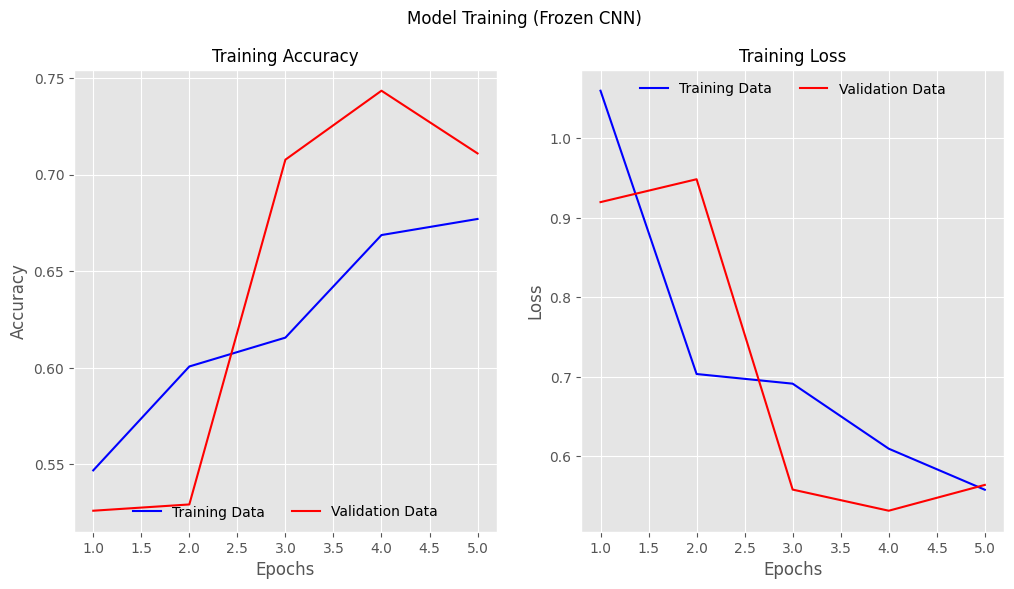

In [38]:
# Plot performance
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)
max_epoch = len(history_01.history['accuracy'])+1
epochs_list = list(range(1, max_epoch))

ax1.plot(epochs_list, history_01.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history_01.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

ax2.plot(epochs_list, history_01.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history_01.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')

This image shows two plots side by side, representing the training progress of a Convolutional Neural Network (CNN) model over five epochs. The title mentions "Model Training (Frozen CNN)," which suggests that this model uses a frozen (non-trainable) base CNN architecture, with only the top layers being trained. 

### Left Plot: Training Accuracy
- **X-axis:** Epochs (1 to 5)
- **Y-axis:** Accuracy, ranging from 0.70 to 0.78
- **Lines:**
  - **Blue Line (Training Data):** The model's accuracy on the training dataset. It starts around 0.74, fluctuates in early epochs, and gradually improves to about 0.78 by the fifth epoch.
  - **Red Line (Validation Data):** The model's accuracy on the validation dataset. It starts around 0.72, initially drops, but then steadily increases to approximately 0.74 by the fifth epoch.

**Interpretation:** The training accuracy shows an upward trend, while the validation accuracy also increases with slight fluctuations. This indicates that the model's performance on both datasets improves over time, which is a positive sign.

### Right Plot: Training Loss
- **X-axis:** Epochs (1 to 5)
- **Y-axis:** Loss, ranging from 0.46 to 0.60
- **Lines:**
  - **Blue Line (Training Data):** The model's loss on the training dataset. It starts around 0.56, decreases consistently to around 0.46 by the fifth epoch, showing good progress in minimizing training loss.
  - **Red Line (Validation Data):** The model's loss on the validation dataset. This line fluctuates more compared to training loss, starting around 0.56, spiking around the third epoch, and ending around 0.58.

**Interpretation:** The training loss decreases steadily, which is expected as the model learns. However, the validation loss fluctuates, indicating that the model might be experiencing some overfitting or instability when generalized to unseen data.

### Overall Summary
The model shows steady improvements in training accuracy and loss, but the fluctuations in validation metrics suggest potential overfitting or insufficient generalization. This could be due to limited epochs, or it may indicate that the model needs more regularization (e.g., dropout layers) or tuning.

In [39]:
# Saving the model 
if not os.path.isdir('model_weights/'): # create a folder and save the model
    os.mkdir('model_weights/')
model_01.save_weights(filepath="model_weights/vgg19_model_01.weights.h5", overwrite=True)

In [40]:
model_01.load_weights(r'D:\CODING\MACHINE LEARNING\MACHINE LEARNING PROJECTS\BrainTumor Detection\model_weights\vgg19_model_01.weights.h5') # Loading Pre-trained Weights

vgg_test_eval_01 = model_01.evaluate(test_generator) # This line evaluates the performance of model_01 on a dataset generated by test_generator.

vgg_val_eval_01 = model_01.evaluate(valid_generator) # This line evaluates the performance of model_01 on a dataset generated by valid_generator.

c:\Users\radhe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.6248 - loss: 0.6359
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7613 - loss: 0.5369


In [41]:
print(f'Validation Loss: {vgg_val_eval_01[0]}')
print(f'Validation Acc: {vgg_val_eval_01[1]*100}')
print(f'Testing Loss: {vgg_test_eval_01[0]}')
print(f'Testing Acc: {vgg_test_eval_01[1]*100}')

Validation Loss: 0.5357449054718018
Validation Acc: 74.35064911842346
Testing Loss: 0.6320309042930603
Testing Acc: 64.838707447052


In [42]:
filenames = test_generator.filenames
n_sample = len(filenames)

vgg_prediction_01 = model_01.predict(test_generator , steps= n_sample , verbose= 1)
y_pred = np.argmax(vgg_prediction_01 , axis=1)

# 1. **Retrieve Filenames in Test Dataset**:
#    ```python
#    filenames = test_generator.filenames
#    ```
#    - `test_generator.filenames` retrieves the names of the files in the test dataset.
#    - `filenames` now holds a list of all file names used by `test_generator`.

# 2. **Count the Number of Samples**:
#    ```python
#    n_sample = len(filenames)
#    ```
#    - `len(filenames)` calculates the total number of samples in the test dataset.
#    - `n_sample` stores this count, representing how many images the generator will loop through.

# 3. **Generate Predictions on Test Data**:
#    ```python
#    vgg_prediction_01 = model_01.predict(test_generator, steps=n_sample, verbose=1)
#    ```
#    - `model_01.predict()` generates predictions for all samples provided by `test_generator`.
#    - The `steps=n_sample` parameter ensures the model generates predictions for every sample.
#    - `verbose=1` prints progress during prediction, showing how many samples have been processed.
#    - The result, `vgg_prediction_01`, contains a matrix of prediction scores (probabilities) for each class across all samples.

# 4. When you use `model_01.predict()`, it returns an array of predicted probabilities for each class. Each row in this array represents a sample (or image) from the test dataset, and each column represents a class. For example, if you have two classes, each row might look something like this:
# ```python
# vgg_prediction_01 = [
#     [0.1, 0.9],  # Prediction for sample 1
#     [0.8, 0.2],  # Prediction for sample 2
#     [0.4, 0.6],  # Prediction for sample 3
#     ...
# ]
# ```
# In this example:
# - Each row represents a prediction for one sample (image).
# - Each value in the row represents the probability that the sample belongs to a particular class. Here, the first column might represent “Class 0” and the second column “Class 1.”

# `np.argmax(vgg_prediction_01, axis=1)` takes the index of the highest probability in each row, which represents the predicted class label for that sample. Here’s how it works:

# 1. **For the first sample** `[0.1, 0.9]`: The highest probability is `0.9`, which is at index `1`. So, the predicted class for this sample is `1`.
# 2. **For the second sample** `[0.8, 0.2]`: The highest probability is `0.8`, which is at index `0`. So, the predicted class for this sample is `0`.

310/310 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step


c:\Users\radhe\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


##### Incremental unfreezing and Fine tuning

In [43]:
# 2. **Get Layer Names from the Base Model:**
base_model_layer_names = [layer.name for layer in base_model.layers] #    Here, the names of all layers in `base_model` are extracted into a list, `base_model_layer_names`. This is useful for identifying specific layers later in the code.
base_model_layer_names

['input_layer',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_conv4',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_conv4',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_conv4',
 'block5_pool']

In [44]:
# Here’s a detailed breakdown of this code that builds and configures a modified VGG19 model for training and fine-tuning specific layers:

# 1. **Load the VGG19 Base Model Without the Top Layers:**
base_model = VGG19(include_top=False, input_shape=(120, 120, 3)) # This line loads the VGG19 model, with `include_top=False`, which removes the fully connected layers at the top of the model. This way, the model only contains the convolutional and pooling layers, and the `input_shape` is specified as `(120, 120, 3).


# 2. **Add Custom Layers on Top of VGG19:**
x = base_model.output #Gets the output of the last layer of `base_model`.
flat = Flatten()(x) # Flattens the output to a 1D vector.
class_1 = Dense(4608, activation='relu')(flat) # class_1`: Adds a fully connected layer with 4608 units and ReLU activation.
drop_out = Dropout(0.2)(class_1) # drop_out`: Adds a dropout layer to reduce overfitting.
class_2 = Dense(1152, activation='relu')(drop_out) # class_2`: Adds another fully connected layer with 1152 units and ReLU activation.
output = Dense(2, activation='softmax')(class_2) # `output`: Adds the final output layer with 2 units (for binary classification) and `softmax` activation to output probabilities.

# 3. **Create and Load the Model with Weights:**
model_02 = Model(base_model.inputs, output) # Creates a complete model with `base_model` as the backbone and the custom layers on top.
model_02.load_weights(r'D:\CODING\MACHINE LEARNING\MACHINE LEARNING PROJECTS\BrainTumor Detection\model_weights\vgg19_model_01.weights.h5') # model_02.load_weights(...)`: Loads pre-trained weights from the specified file into `model_02`.

# 4. **Set Specific Layers as Trainable for Fine-Tuning:**
set_trainable = False # `set_trainable = False`: Initializes a flag to control layer trainability.
for layer in base_model.layers: # The loop iterates through each layer in `base_model`.
    if layer.name in ['block5_conv4', 'block5_conv3']:
        set_trainable = True # When the layer is one of `['block5_conv4', 'block5_conv3']`, `set_trainable` is set to `True`.
    if set_trainable:
        layer.trainable = True # If `set_trainable` is `True`, the layer is marked as trainable, allowing it to update weights during training. If `set_trainable` is `False`, the layer is frozen and does not update weights.
    else:
        layer.trainable = False
#    - This setup fine-tunes only the last two convolutional layers (`block5_conv4` and `block5_conv3`) in the VGG19 model, while freezing the earlier layers.

In [45]:
print(model_02.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 120, 120, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 120, 120, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 120, 120, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 60, 60, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 60, 60, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 30, 30, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 30, 30, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 30, 30, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 30, 30, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 15, 15, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4608)           │    21,238,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4608)           │             

 Total params: 46,574,530 (177.67 MB)

 Trainable params: 31,269,762 (119.28 MB)

 Non-trainable params: 15,304,768 (58.38 MB)

None


In [46]:
from tensorflow.keras.optimizers import Adam

# Create the Adam optimizer
adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

# Compile the model with Adam optimizer
model_02.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
# learning_rate=0.0001 : This sets the step size at each iteration while moving toward a minimum of the loss function.

# beta_1=0.9 : This is the exponential decay rate for the first moment estimate. It helps the optimizer consider the past gradients.

# beta_2=0.999: This is the exponential decay rate for the second moment estimate. It helps smooth out the learning process by considering past squared gradients.

# epsilon=1e-07: This is a small constant added to prevent division by zero when calculating the learning rate.

In [47]:
# train_generator: This is the data source for training the model. It generates batches of training data from the directory specified earlier. It provides images and their corresponding labels to the model during training.

# steps_per_epoch=10: This tells the model how many batches of data to process in one epoch before moving to validation. In this case, it will run through 10 batches (each with a specified batch_size from the generator) during each epoch of training.

# epochs=2: This specifies the total number of times the model will go through the entire training dataset. Here, the model will train for 2 epochs, meaning it will see the entire training set twice.

# callbacks=[es, cp, lrr]:This is a list of callback functions that will be executed during training:

# es: EarlyStopping, which will stop training if there’s no improvement in validation loss.

# cp: ModelCheckpoint, which saves the best model based on validation loss.

# lrr: ReduceLROnPlateau, which will reduce the learning rate if validation accuracy doesn’t improve.

# validation_data=valid_generator: This is the data source for validating the model. The model will use this data to evaluate its performance at the end of each epoch. The validation generator provides batches of validation data, similar to the training generator.

history_02 = model_02.fit(train_generator, steps_per_epoch=10, epochs=5, callbacks=[es, cp, lrr], validation_data=valid_generator)


Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6903 - loss: 0.5981
Epoch 1: val_loss improved from 0.53167 to 0.51887, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.6892 - loss: 0.5977 - val_accuracy: 0.7468 - val_loss: 0.5189 - learning_rate: 1.0000e-04
Epoch 2/5


c:\Users\radhe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_accuarcy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7399 - loss: 0.5043
Epoch 2: val_loss did not improve from 0.51887
10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.7399 - loss: 0.5025 - val_accuracy: 0.7208 - val_loss: 0.6247 - learning_rate: 1.0000e-04
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7426 - loss: 0.5410
Epoch 3: val_loss improved from 0.51887 to 0.46359, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.7410 - loss: 0.5433 - val_accuracy: 0.7890 - val_loss: 0.4636 - learning_rate: 1.0000e-04
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7503 - loss: 0.4963
Epoch 4: val_loss did not improve from 0.46359
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.7454 - loss: 0.5039 - val_accuracy: 0.7468 - val_loss: 0.4994 - learning_rate: 1.0000e-04
Epoch 5/5
 6/10 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7858 - loss: 0.5171
Epoch 5: val_loss did not improve from 0.46359
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 3

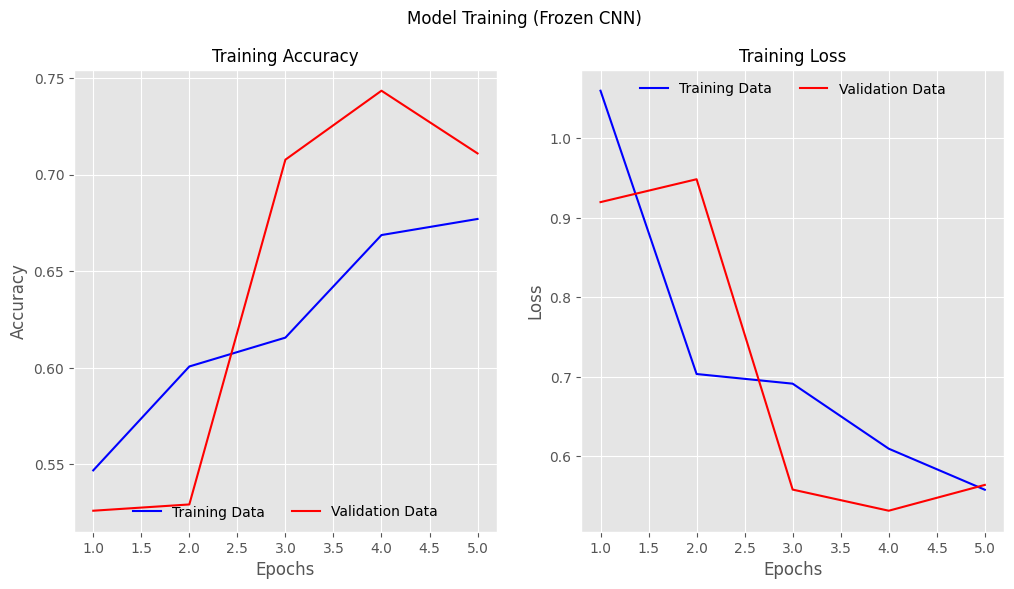

In [48]:
# Plot performance
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)
max_epoch = len(history_01.history['accuracy'])+1
epochs_list = list(range(1, max_epoch))

ax1.plot(epochs_list, history_01.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history_01.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

ax2.plot(epochs_list, history_01.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history_01.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')

In [49]:
# Saving the model
if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')
model_02.save_weights(filepath="model_weights/vgg19_model_02.weights.h5", overwrite=True)

In [50]:

model_02.load_weights(r'D:\CODING\MACHINE LEARNING\MACHINE LEARNING PROJECTS\BrainTumor Detection\model_weights\vgg19_model_02.weights.h5')
vgg_val_eval_02 = model_02.evaluate(valid_generator) # This line evaluates the performance of model_02 on a dataset generated by test_generator.
vgg_test_eval_02 = model_02.evaluate(test_generator) # This line evaluates the performance of model_02 on a dataset generated by valid_generator.

10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5183 - loss: 0.7426
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.5274 - loss: 0.7632


In [51]:
print(f'Validation Loss: {vgg_val_eval_02[0]}')
print(f'Validation Acc: {vgg_val_eval_02[1]*100}')
print(f'Testing Loss: {vgg_test_eval_02[0]}')
print(f'Testing Acc: {vgg_test_eval_02[1]*100}')

Validation Loss: 0.5406762361526489
Validation Acc: 69.15584206581116
Testing Loss: 0.5848081707954407
Testing Acc: 66.45161509513855


Unfreezing the Entire Network

In [52]:
# You’re initially setting up the model with all layers set as trainable, which means they’re ready to be updated based on your data. Then, by selectively freezing some layers and unfreezing others, you allow only specific layers to learn from the training data. This approach is particularly effective for transfer learning, as it balances retaining valuable pre-trained features with learning features specific to your dataset.
base_model = VGG19(include_top=False, input_shape=(120,120,3))

x=base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation = 'relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(drop_out)
output = Dense(2, activation = 'softmax')(class_2)

model_03 = Model(base_model.inputs, output)
model_03.load_weights(r'D:\CODING\MACHINE LEARNING\MACHINE LEARNING PROJECTS\BrainTumor Detection\model_weights\vgg19_model_02.weights.h5')

from tensorflow.keras.optimizers import Adam

# Create the Adam optimizer
adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

# Compile the model with Adam optimizer
model_03.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [53]:
model_03.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 120, 120, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 120, 120, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 120, 120, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 60, 60, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 60, 60, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 30, 30, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 30, 30, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 30, 30, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 30, 30, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 15, 15, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4608)           │    21,238,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4608)           │             

 Total params: 46,574,530 (177.67 MB)

 Trainable params: 46,574,530 (177.67 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# train_generator: This is the data source for training the model. It generates batches of training data from the directory specified earlier. It provides images and their corresponding labels to the model during training.

# steps_per_epoch=10: This tells the model how many batches of data to process in one epoch before moving to validation. In this case, it will run through 10 batches (each with a specified batch_size from the generator) during each epoch of training.

# epochs=2: This specifies the total number of times the model will go through the entire training dataset. Here, the model will train for 2 epochs, meaning it will see the entire training set twice.

# callbacks=[es, cp, lrr]:This is a list of callback functions that will be executed during training:

# es: EarlyStopping, which will stop training if there’s no improvement in validation loss.

# cp: ModelCheckpoint, which saves the best model based on validation loss.

# lrr: ReduceLROnPlateau, which will reduce the learning rate if validation accuracy doesn’t improve.

# validation_data=valid_generator: This is the data source for validating the model. The model will use this data to evaluate its performance at the end of each epoch. The validation generator provides batches of validation data, similar to the training generator.

history_03 = model_03.fit(train_generator, steps_per_epoch=10, epochs = 5, callbacks=[es,cp,lrr], validation_data=valid_generator)

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5442 - loss: 0.8242
Epoch 1: val_loss did not improve from 0.46359
10/10 ━━━━━━━━━━━━━━━━━━━━ 61s 6s/step - accuracy: 0.5419 - loss: 0.8191 - val_accuracy: 0.5227 - val_loss: 0.6931 - learning_rate: 1.0000e-04
Epoch 2/5


c:\Users\radhe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_accuarcy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5111 - loss: 0.6930
Epoch 2: val_loss did not improve from 0.46359
10/10 ━━━━━━━━━━━━━━━━━━━━ 66s 7s/step - accuracy: 0.5141 - loss: 0.6931 - val_accuracy: 0.5260 - val_loss: 0.6919 - learning_rate: 1.0000e-04
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4652 - loss: 0.6967
Epoch 3: val_loss did not improve from 0.46359
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.4629 - loss: 0.6968 - val_accuracy: 0.5260 - val_loss: 0.6931 - learning_rate: 1.0000e-04
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5211 - loss: 0.6931
Epoch 4: val_loss did not improve from 0.46359
10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - accuracy: 0.5246 - loss: 0.6931 - val_accuracy: 0.5260 - val_loss: 0.6930 - learning_rate: 1.0000e-04
Epoch 4: early stopping


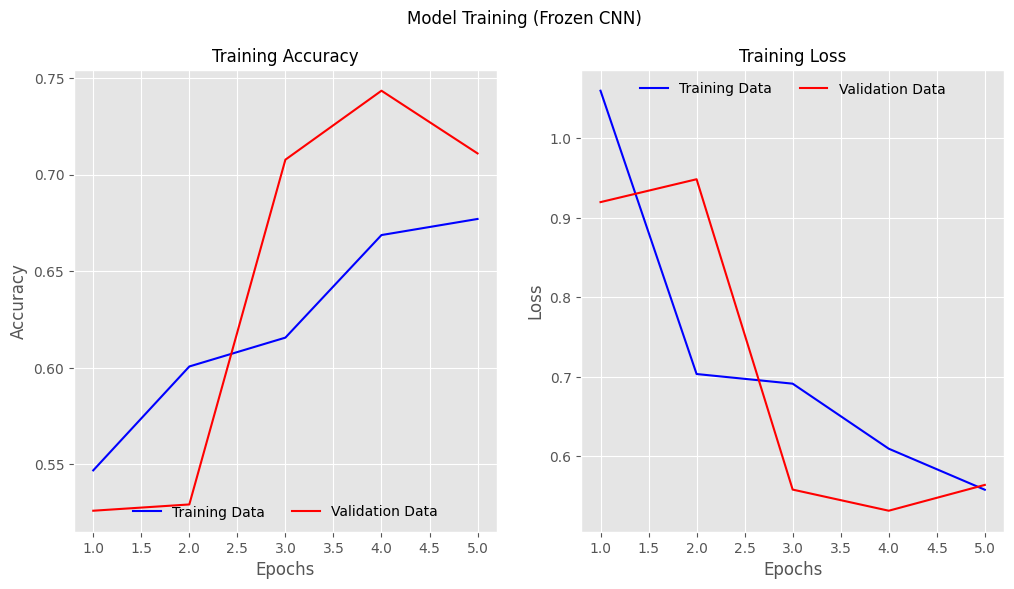

In [55]:
# Plot performance
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)
max_epoch = len(history_01.history['accuracy'])+1
epochs_list = list(range(1, max_epoch))

ax1.plot(epochs_list, history_01.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history_01.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

ax2.plot(epochs_list, history_01.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history_01.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')

In [56]:
# Saving the model
if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')
model_01.save_weights(filepath="model_weights/vgg19_model_03.weights.h5", overwrite=True)

In [57]:
model_03.load_weights(r'D:\CODING\MACHINE LEARNING\MACHINE LEARNING PROJECTS\BrainTumor Detection\model_weights\vgg19_model_03.weights.h5')
vgg_val_eval_03 = model_03.evaluate(valid_generator) #  This line evaluates the performance of model_03 on a dataset generated valid_generator.
vgg_test_eval_03 = model_03.evaluate(test_generator) # This line evaluates the performance of model_03 on a dataset generated by test_generator.

c:\Users\radhe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 78 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7804 - loss: 0.5423
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.6918 - loss: 0.5956


In [58]:
print(f'Validation Loss: {vgg_val_eval_03[0]}')
print(f'Validation Acc: {vgg_val_eval_03[1] * 100}')
print(f'Testing Loss: {vgg_test_eval_03[0]}')
print(f'Testing Acc: {vgg_test_eval_03[1]*100}')

Validation Loss: 0.5330802798271179
Validation Acc: 76.6233742237091
Testing Loss: 0.6121621131896973
Testing Acc: 68.38709712028503
